In [0]:
import torch
import matplotlib.pyplot as plt

In [0]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)

# **Train dataset**

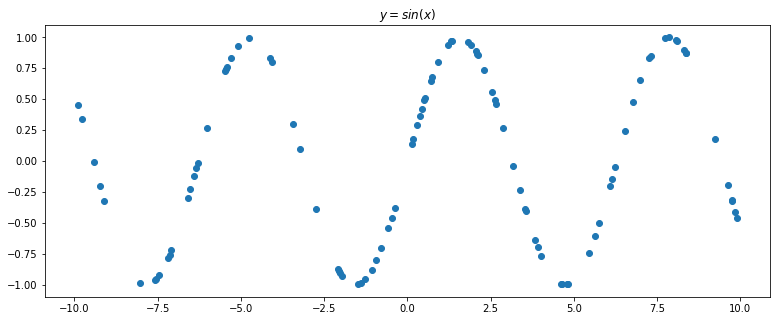

In [4]:
x_train = torch.rand(100)
x_train = x_train *20.0 - 10.0

y_train = torch.sin(x_train)

plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('$y = sin(x)$');

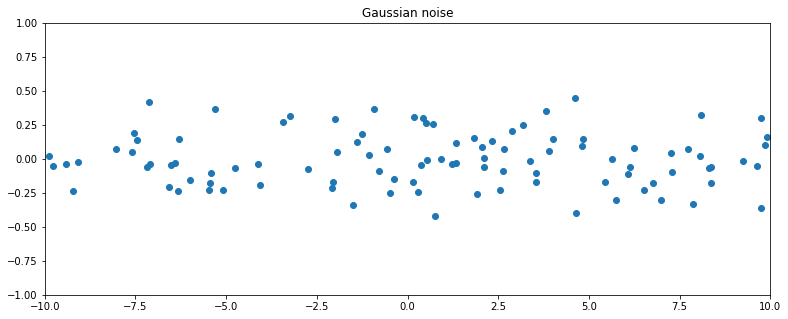

In [5]:
noise = torch.randn(y_train.shape)/5.

plt.plot(x_train.numpy(), noise.numpy(), 'o')
plt.axis([-10, 10, -1, 1])
plt.title('Gaussian noise');

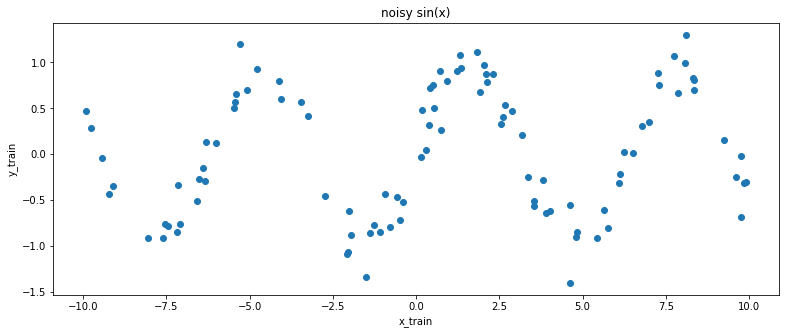

In [6]:
y_train = y_train + noise

plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('noisy sin(x)')
plt.xlabel('x_train')
plt.ylabel('y_train');

In [0]:
x_train.unsqueeze_(1)
y_train.unsqueeze_(1);

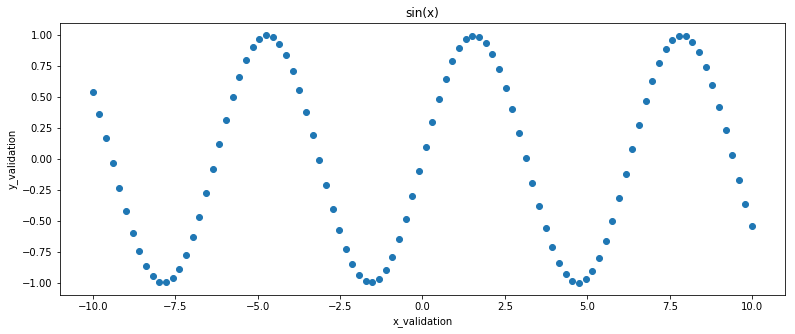

In [21]:
x_validation = torch.linspace(-10, 10, 100)
y_validation = torch.sin(x_validation.data)
plt.plot(x_validation.numpy(), y_validation.numpy(), 'o')

plt.title('sin(x)')
plt.xlabel('x_validation')
plt.ylabel('y_validation');

In [0]:
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1);



# Model construction

In [0]:
class SineNet(torch.nn.Module):
  def __init__(self, n_hidden_neurons):
    super(SineNet, self).__init__()
    self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
    self.act1 = torch.nn.Sigmoid()
    self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

  def forward(self, x):
    x = self.fc1(x)
    x = self.act1(x)
    x = self.fc2(x)
    return x

sine_net = SineNet(50)

# Prediction

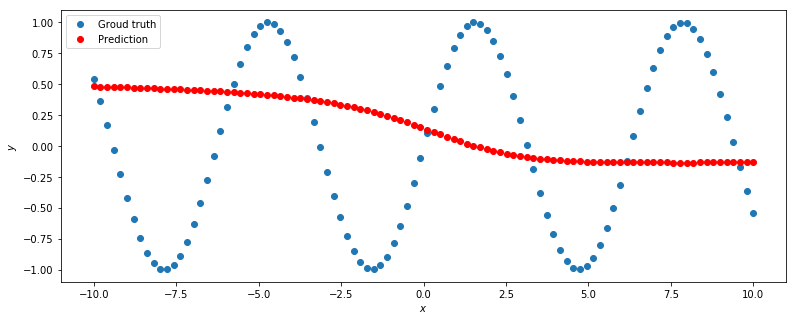

In [30]:
def predict(net, x, y):
    y_pred = net.forward(x)

    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')

predict(sine_net, x_validation, y_validation)

# Optimizer

In [0]:
optimizer = torch.optim.Adam(sine_net.parameters(), lr=0.01)

# Loss function

In [0]:
def loss(pred, target):
  squares = (pred-target)**2
  return squares.mean()

def metric(pred, target):
  return (pred-target).abs().mean()

# Training procedure

0.08592794090509415


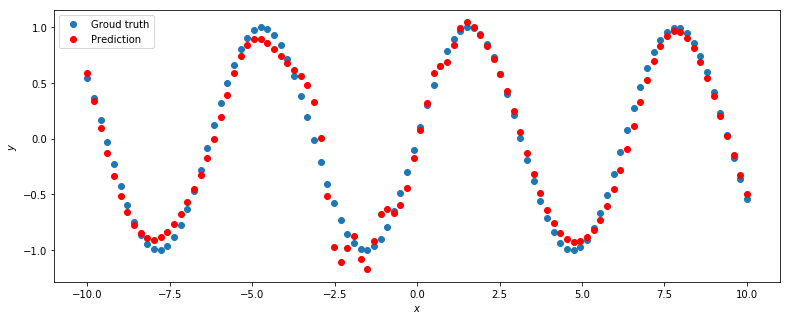

In [37]:
for epoch_index in range(2000):
  optimizer.zero_grad()
  
  y_pred = sine_net.forward(x_train)
  loss_val = loss(y_pred, y_train)
  
  loss_val.backward()
  
  optimizer.step()
  
predict(sine_net, x_validation, y_validation)
print(metric(sine_net.forward(x_validation), y_validation).item())

0.022470610216259956


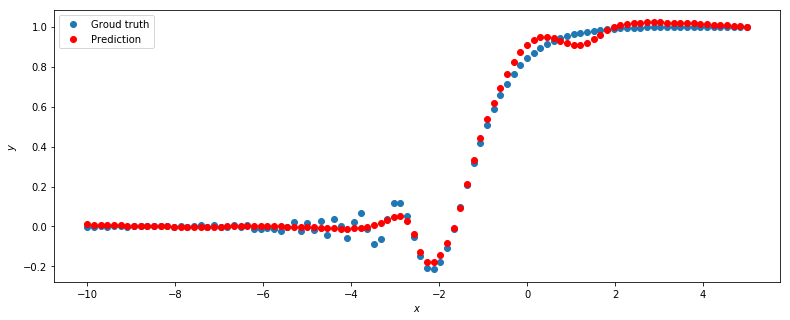

In [102]:
class RegressionNet(torch.nn.Module):
  def __init__(self, n_hidden_neurons):
    super(RegressionNet, self).__init__()
    self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
    self.act1 = torch.nn.Tanh()
    self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)
    
  
  def forward(self, x):
    x = self.fc1(x)
    x = self.act1(x)
    x = self.fc2(x)
    
    return x

net = RegressionNet(100)

def target_function(x):
  return 2**x * torch.sin(2**-x)

# ------Dataset preparation start--------:
x_train =  torch.linspace(-10, 5, 100)
y_train = target_function(x_train)
noise = torch.randn(y_train.shape) / 20.
y_train = y_train + noise
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

x_validation = torch.linspace(-10, 5, 100)
y_validation = target_function(x_validation)
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)
# ------Dataset preparation end--------:

def metric(pred, target):
    return (pred - target).abs().mean()

def predict(net, x, y):
    y_pred = net.forward(x)

    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')

optimizer = torch.optim.Adam(net.parameters(), lr= 0.02)

def loss(pred, target):
  squares = (pred-target)**2
  return squares.mean()
    # your code here

for epoch_index in range(5000):
    optimizer.zero_grad()

    y_pred = net.forward(x_train)
    loss_value = loss(y_pred, y_train)
    
    loss_value.backward()
    optimizer.step()
    
predict(net, x_validation, y_validation)
print(metric(net.forward(x_validation), y_validation).item())